In [186]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

## Linear regression with one variable

implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

In [206]:
# the dataset is loaded from the data file into the variables X
# and y:

data = genfromtxt('./data/ex1data1.txt', delimiter=',')

X = data[:, 0]
y = data[: , 1]

m,n = data.shape

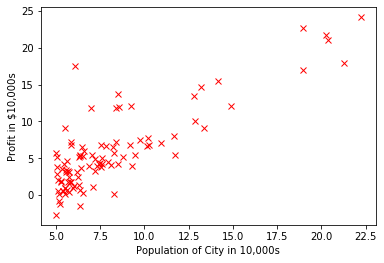

In [207]:
# create a scatter plot of the data.

plt.plot(X, y, 'rx')

plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');

## Gradient Descent

fit the linear regression parameters θ to our dataset
using gradient descent.


![Cost Function](./images/linear%20regesstion%20-%20cost%20function.png)

Recall that the parameters of your model are the θ j values. These are
the values you will adjust to minimize cost J(θ).

![Gradient Descent](./images/gradient%20descent%20-%20linear%20reg.png)

### Implementation

In [208]:
# we add another dimension to our data to accommodate the θ0 intercept term. 
# We also initialize the initial parameters to 0 and the
# learning rate alpha to 0.01.

X = np.column_stack((np.ones(m), X))

theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

In [191]:
print(f'X: {X.shape}\nTheta: {theta.shape}')

X: (97, 3)
Theta: (2, 1)


### Computing the cost J(θ)

As you perform gradient descent to learn minimize the cost function J(θ),
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate J(θ) so you can check the
convergence of your gradient descent implementation.

In [72]:
J = 0

h = X.dot(theta)

h = h.reshape(m)

squareDiff = (h - y)**2

J = 1/(2*m)*sum(squareDiff)

In [197]:
print(f'Cost for Theta values {theta.ravel()} is : {J}')

Cost for Theta values [0. 0.] is : 32.072733877455654


In [209]:
# wrap cost calculator as function

def computeCost(X, y, theta):
    m = len(y)
    J = 0
    
    theta = np.array(theta).reshape(2,1)
    
    h = X.dot(theta)
    
    h = h.reshape(m)
    y = y.reshape(m)

    squareDiff = (h - y)**2

    J = 1/(2*m)*sum(squareDiff)
    
    return J

In [199]:
# computeCost(X, y, theta)

computeCost(X, y, [-1, 2])

54.24245508201238

### Computing Gradient Descent

In [200]:
J_history = []
y = y.reshape(m,1)

for iter in range(0, iterations):
    h = X.dot(theta)
    
    cost = h - y
    
    theta = theta - (alpha/m) * X.T.dot(cost)
    
    J_history.append(computeCost(X, y, theta))

In [201]:
# function

def gradientDescent(X, y, theta, alpha=0.01, iterations = 1500):
    J_history = []
    
    y = y.reshape(m,1)

    for iter in range(0, iterations):
        h = X.dot(theta)

        cost = h - y

        theta = theta - (alpha/m) * X.T.dot(cost)

        J_history.append(computeCost(X, y, theta))

    return theta, J_history

In [210]:
t, J_h = gradientDescent(X, y, theta, alpha, iterations)

In [211]:
t

array([[-3.63029144],
       [ 1.16636235]])

Text(0.5, 0, 'Number of Iteration')

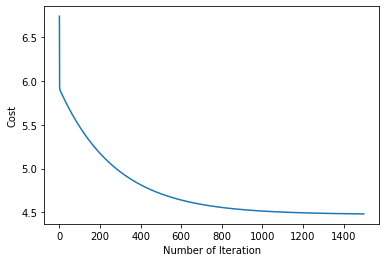

In [214]:
# plot cost with respect to number of iterations to make sure cost is decreasing

plt.plot(range(0, iterations), J_h)

plt.ylabel('Cost')
plt.xlabel('Number of Iteration')

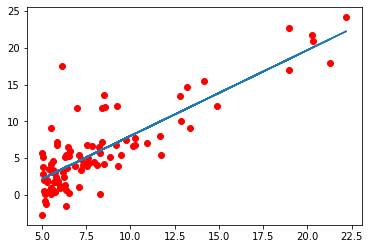

In [213]:
plt.scatter(X[:, 1], y, color='red')

# mx+b
y_pred = t[1]*X[:,1] + t[0]

plt.plot(X[:,1], y_pred)

# Linear regression with multiple variables

## Feature Normalization

When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

Steps:
1. Subtract the mean value of each feature from the dataset.
2. After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [233]:
data2 = genfromtxt('./data/ex1data2.txt', delimiter=',')

X = data2[:, [0,1]]
y = data2[: , 2]

m,n = data2.shape

m,n

(47, 3)

In [234]:
X[:10], y[:10]

(array([[2.104e+03, 3.000e+00],
        [1.600e+03, 3.000e+00],
        [2.400e+03, 3.000e+00],
        [1.416e+03, 2.000e+00],
        [3.000e+03, 4.000e+00],
        [1.985e+03, 4.000e+00],
        [1.534e+03, 3.000e+00],
        [1.427e+03, 3.000e+00],
        [1.380e+03, 3.000e+00],
        [1.494e+03, 3.000e+00]]),
 array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
        198999., 212000., 242500.]))

In [242]:
# mean for each feature

mu = X.mean(axis = 0)

sigma = X.std(axis = 0)

meanDiff = X - mu

X_norm = meanDiff / sigma

In [243]:
'''
Normalize features
@returns normalized X, mean and std of each fature
'''

def featureNormalize(X):
    mu = X.mean(axis = 0)

    sigma = X.std(axis = 0)

    meanDiff = X - mu

    X_norm = meanDiff / sigma
    
    return X_norm, mu, sigma

## Normal Equation

![Normal Equation](./images/normal%20eqn.png)

Using this formula does not require any feature scaling

In [ ]:
def normalEqn(X, y):
    return np.linalg.pinv(X.T.dot(X))